In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

plt.style.use("seaborn-v0_8-whitegrid")
sns.set(rc={"figure.figsize":(10,5)})

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [14]:
bike1 = pd.read_excel("./data/공공자전거 대여소 정보(2212).xlsx",skiprows=4)
bike2 = pd.read_excel("./data/서울특별시 공공자전거 대여소별 이용정보(월별)_22.7-22.12.xlsx")
bike3 = pd.read_csv("./data/서울특별시 공공자전거 이용정보(시간대별)_22.12.csv",encoding='cp949')

In [16]:
bike1.head(5)

Unnamed: 0    Unnamed: 1 Unnamed: 2                       Unnamed: 3  \
0         301   경복궁역 7번출구 앞        종로구  서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞   
1         302   경복궁역 4번출구 뒤        종로구  서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤   
2         303   광화문역 1번출구 앞        종로구       서울특별시 종로구 세종대로 지하189 세종로공원   
3         305        종로구청 옆        종로구               서울특별시 종로구 세종로 84-1   
4         307     서울역사박물관 앞        종로구      서울특별시 종로구 새문안로 55 서울역사박물관 앞   

   Unnamed: 4  Unnamed: 5          Unnamed: 6  Unnamed: 7  Unnamed: 8  \
0   37.575794  126.971451 2015-10-07 12:03:46        20.0         NaN   
1   37.575947  126.974060 2015-10-07 12:04:22         NaN        12.0   
2   37.571770  126.974663 2015-10-07 00:00:00         NaN         8.0   
3   37.572559  126.978333 2015-01-07 00:00:00         NaN        16.0   
4   37.570000  126.971100 2015-10-07 12:09:09         NaN        11.0   

  Unnamed: 9  
0        LCD  
1         QR  
2         QR  
3         QR  
4         QR

In [17]:
bike2.head(4)

자치구                            대여소명    기준년월  대여건수  반납건수
0  강남구                2301. 현대고등학교 건너편  202207  2170  2183
1  강남구  2302. 교보타워 버스정류장(신논현역 3번출구 후면)  202207  1140  1143
2  강남구                 2303. 논현역 10번출구  202207  1329  1196
3  강남구                    2304. 대현그린타워  202207   288   104

In [20]:
bike3.head(2)

대여일자  대여시간  대여소번호           대여소명 대여구분코드   성별 연령대코드  이용건수    운동량  \
0  2022-12-01     0    746  746. 목동2단지 상가    정기권  NaN  ~10대     1  13.54   
1  2022-12-01     0   1653  1653. 노원역1번출구    정기권  NaN  ~10대     1  32.81   

    탄소량  이동거리(M)  이용시간(분)  
0  0.13   570.00        3  
1  0.36  1534.33       12

In [19]:
bike1.columns=['대여소번호','대여소명','자치구','상세주소','위도','경도','설치시기','거치대수lcd','거치대수qr','운영방식']
bike1.head(1)

대여소번호          대여소명  자치구                             상세주소         위도  \
0    301   경복궁역 7번출구 앞  종로구  서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞  37.575794   

           경도                설치시기  거치대수lcd  거치대수qr 운영방식  
0  126.971451 2015-10-07 12:03:46     20.0     NaN  LCD

In [22]:
bike1.drop(columns=["상세주소","위도","경도"],inplace=True)

In [24]:
bike1.head(2)

대여소번호          대여소명  자치구                설치시기  거치대수lcd  거치대수qr 운영방식
0    301   경복궁역 7번출구 앞  종로구 2015-10-07 12:03:46     20.0     NaN  LCD
1    302   경복궁역 4번출구 뒤  종로구 2015-10-07 12:04:22      NaN    12.0   QR

In [27]:
bike1.fillna(0,inplace=True)
bike1.isna().sum()

대여소번호      0
대여소명       0
자치구        0
설치시기       0
거치대수lcd    0
거치대수qr     0
운영방식       0
dtype: int64

In [32]:
bike1['대여소번호'].dtypes

dtype('O')

In [31]:
bike1['대여소번호'] = bike1['대여소번호'].astype(object)

### (2) bike2
    1. 대여소명에 있는 숫자와 문자를 분리

In [33]:
bike2['대여소명'].dtypes

dtype('O')

In [38]:
bike2["대여소번호"] = bike2["대여소명"].str.split(".",expand=True)[0]
bike2["대여소명_new"] = bike2["대여소명"].str.split(".",expand=True)[1]
bike2.head(2)

자치구                            대여소명    기준년월  대여건수  반납건수 대여소번호  \
0  강남구                2301. 현대고등학교 건너편  202207  2170  2183  2301   
1  강남구  2302. 교보타워 버스정류장(신논현역 3번출구 후면)  202207  1140  1143  2302   

                    대여소명_new  
0                 현대고등학교 건너편  
1   교보타워 버스정류장(신논현역 3번출구 후면)

In [39]:
bike2[bike2["대여소명_new"].isnull()]

Empty DataFrame
Columns: [자치구, 대여소명, 기준년월, 대여건수, 반납건수, 대여소번호, 대여소명_new]
Index: []

In [40]:
bike3["대여소명_new"] = bike3["대여소명"].str.split(".",expand=True)[1]
bike3.head(2)

대여일자  대여시간  대여소번호           대여소명 대여구분코드   성별 연령대코드  이용건수    운동량  \
0  2022-12-01     0    746  746. 목동2단지 상가    정기권  NaN  ~10대     1  13.54   
1  2022-12-01     0   1653  1653. 노원역1번출구    정기권  NaN  ~10대     1  32.81   

    탄소량  이동거리(M)  이용시간(분)   대여소명_new  
0  0.13   570.00        3   목동2단지 상가  
1  0.36  1534.33       12    노원역1번출구

In [51]:
bike3["성별"].unique()

array([nan, 'F', 'M'], dtype=object)

In [52]:
bike3["성별"].value_counts()

성별
M    726745
F    385972
Name: count, dtype: int64

In [53]:
bike3.query("성별 == 'm'").index

Index([], dtype='int64')

In [54]:
bike3.loc[bike3.query("성별 == 'm'").index,"성별"] = "M"
bike3.loc[bike3.query("성별 == 'f'").index,"성별"] = "F"

In [60]:
bike3["성별"].isna().sum()

526252

In [61]:
bike3.dtypes

대여일자         object
대여시간          int64
대여소번호         int64
대여소명         object
대여구분코드       object
성별           object
연령대코드        object
이용건수          int64
운동량          object
탄소량          object
이동거리(M)     float64
이용시간(분)       int64
대여소명_new     object
dtype: object

In [65]:
# bike3["운동량"].astype("float64")
# pd.to_numeric(bike3["운동량"])


In [73]:
# /N 데이터 확인
bike3.loc[bike3["운동량"] == r'\N']

대여일자  대여시간  대여소번호                     대여소명 대여구분코드   성별 연령대코드  \
94       2022-12-01     0   4515             4515. 동문굿모닝탑    정기권  NaN   20대   
763      2022-12-01     0   4820          4820. 망우역 2번 출구    정기권    M   60대   
866      2022-12-01     0   2293              2293. SPC 앞    일일권    M   20대   
1077     2022-12-01     0   4578              4578.보라매sk뷰    정기권    M   20대   
1424     2022-12-01     1   1192   1192. 마곡수명산파크 209동 건너편    정기권  NaN    기타   
...             ...   ...    ...                      ...    ...  ...   ...   
1637059  2022-12-31    22   5851          5851. 도림천 건널목 위    일일권    F   20대   
1637140  2022-12-31    22    550            550. 서울시설공단 앞    일일권    M   20대   
1638552  2022-12-31    23   4785             4785. 롯데시티호텔    일일권    M   20대   
1638669  2022-12-31    23   2306       2306. 압구정역 2번 출구 옆    일일권    F   30대   
1638873  2022-12-31    23   1297  1297. 석촌호수교차로(동호 팔각정 앞)    정기권    M   30대   

         이용건수 운동량 탄소량  이동거리(M)  이용시간(분)            대여소명_new  
94          1  \N  \N      0.0        8              동문굿모닝탑  
763         1  \N  \N      0.0       60           망우역 2번 출구  
866         1  \N  \N      0.0       10               SPC 앞  
1077        1  \N  \N      0.0       15              보라매sk뷰  
1424        1  \N  \N      0.0       10    마곡수명산파크 209동 건너편  
...       ...  ..  ..      ...      ...                 ...  
1637059     1  \N  \N      0.0       20           도림천 건널목 위  
1637140     1  \N  \N      0.0       54            서울시설공단 앞  
1638552     1  \N  \N      0.0       60              롯데시티호텔  
1638669     1  \N  \N      0.0      118        압구정역 2번 출구 옆  
1638873     1  \N  \N      0.0       30   석촌호수교차로(동호 팔각정 앞)  

[5751 rows x 13 columns]

In [74]:
bike3.loc[(bike3["운동량"] == r'\N'),"운동량"]=-1
bike3.loc[(bike3["탄소량"] == r'\N'),"탄소량"]=-1

In [75]:
bike3["운동량"] = bike3["운동량"].astype("float64")
bike3["탄소량"] = bike3["탄소량"].astype("float64")

In [76]:
bike3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638969 entries, 0 to 1638968
Data columns (total 13 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   대여일자      1638969 non-null  object 
 1   대여시간      1638969 non-null  int64  
 2   대여소번호     1638969 non-null  int64  
 3   대여소명      1638969 non-null  object 
 4   대여구분코드    1638969 non-null  object 
 5   성별        1112717 non-null  object 
 6   연령대코드     1638969 non-null  object 
 7   이용건수      1638969 non-null  int64  
 8   운동량       1638969 non-null  float64
 9   탄소량       1638969 non-null  float64
 10  이동거리(M)   1638969 non-null  float64
 11  이용시간(분)   1638969 non-null  int64  
 12  대여소명_new  1638967 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 162.6+ MB


In [77]:
bike3.head(1)

대여일자  대여시간  대여소번호           대여소명 대여구분코드   성별 연령대코드  이용건수    운동량  \
0  2022-12-01     0    746  746. 목동2단지 상가    정기권  NaN  ~10대     1  13.54   

    탄소량  이동거리(M)  이용시간(분)   대여소명_new  
0  0.13    570.0        3   목동2단지 상가

In [78]:
bike3["대여일자"] = pd.to_datetime(bike3["대여일자"])

In [80]:
print(bike3["대여일자"].dtypes)

datetime64[ns]


#### 4. 데이터 분석
    - 이동거리/평균 사용 시간이 높은 대여소는?
    - 운동량과 이동거리의 상관관계는?
    - 따릉이를 가장 많이 이용하는 성별은?
    - 서울시 구별 거치대의 개수는?
    - 서울시 구별로 거치대의 개수와 대여건수는?

In [81]:
bike3.head(2)

대여일자  대여시간  대여소번호           대여소명 대여구분코드   성별 연령대코드  이용건수    운동량   탄소량  \
0 2022-12-01     0    746  746. 목동2단지 상가    정기권  NaN  ~10대     1  13.54  0.13   
1 2022-12-01     0   1653  1653. 노원역1번출구    정기권  NaN  ~10대     1  32.81  0.36   

   이동거리(M)  이용시간(분)   대여소명_new  
0   570.00        3   목동2단지 상가  
1  1534.33       12    노원역1번출구

In [82]:
# 대여소명_new 를 기준으로 이동거리(평균)가 가장 큰 순서대로 대여소명 추출
# groupby

# 대여소명_new, 이동거리

In [86]:
bike3.groupby("대여소명_new")["이동거리(M)"].mean().reset_index().sort_values("이동거리(M)")

대여소명_new      이동거리(M)
1489                에이텍   132.157143
2625       천왕이펜하우스3단지 앞   937.106186
703             마곡역1번출구   981.727121
1906         진관동 은빛초등학교   982.127201
701       마곡역 교차로(2번출구)  1010.258902
...                 ...          ...
565    독산보도육교 앞 자전거 보관소  6474.211608
1441             압구정나들목  6581.370369
2561              옛골 입구  6800.084000
1497           여의도중학교 옆  6812.727628
615     동작역 5번출구 동작주차공원  6857.403043

[2691 rows x 2 columns]

In [88]:
bike3.groupby("대여소명_new")["이용시간(분)"].mean().reset_index().sort_values("이용시간(분)")

대여소명_new    이용시간(분)
2625      천왕이펜하우스3단지 앞   7.716495
1702   은평뉴타운 상림마을 13단지   8.530120
701      마곡역 교차로(2번출구)   8.665695
690          마곡동 767-6   8.890613
377            기자촌 사거리   9.050000
...                ...        ...
1119         서울숲 관리사무소  46.863057
1497          여의도중학교 옆  52.875000
818        문정·가락 대여소 앞  54.687500
1431            안골마을입구  55.150000
2435        서울숲 공영주차장앞  56.938144

[2691 rows x 2 columns]

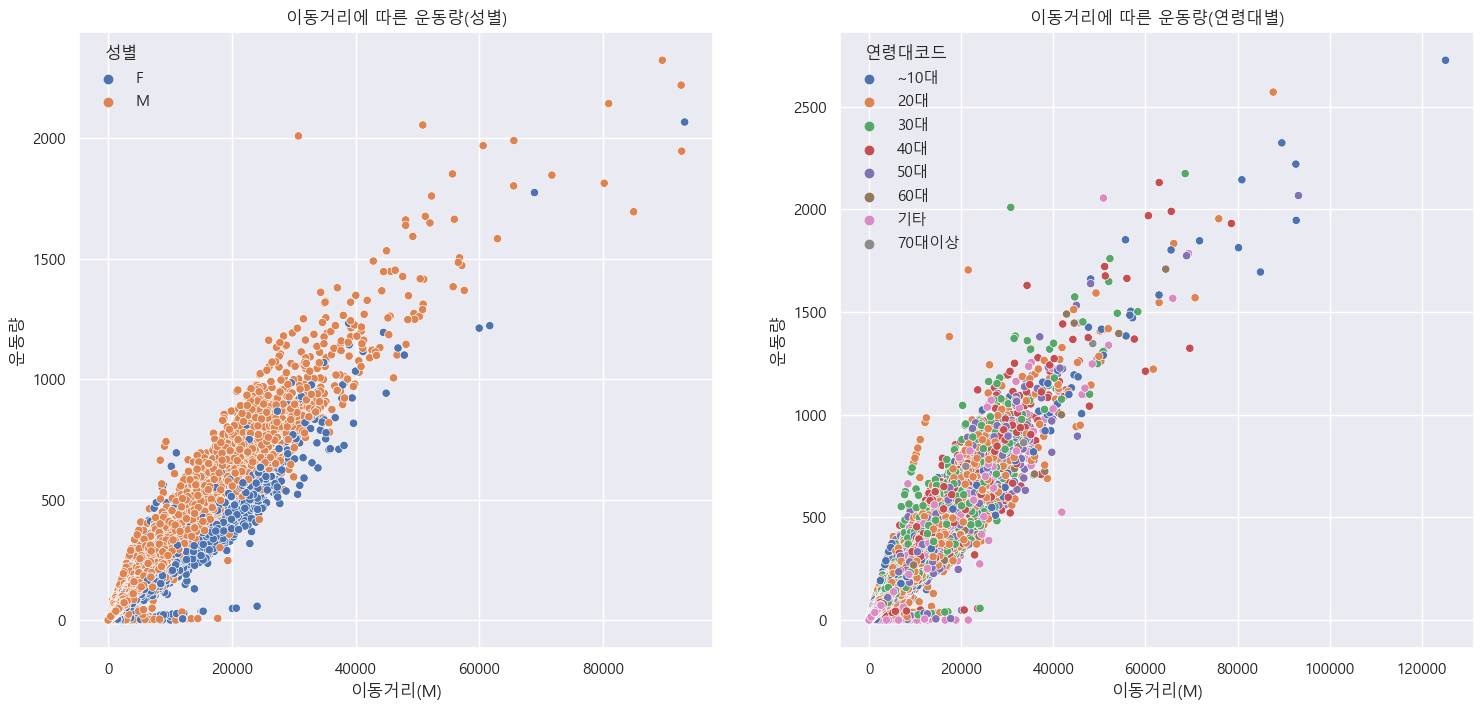

In [93]:
f, ax = plt.subplots(1,2,figsize=(18,8))

sns.scatterplot(x="이동거리(M)",y="운동량",data=bike3, ax=ax[0], hue="성별", sizes=0.1)
ax[0].set_title('이동거리에 따른 운동량(성별)')

sns.scatterplot(x="이동거리(M)",y="운동량",data=bike3, ax=ax[1], hue="연령대코드")
ax[1].set_title('이동거리에 따른 운동량(연령대별)')

plt.show()


In [94]:
# 대여일자 데이터(2022-02-12)를 대여년, 대여월, 대여일 로 나눠 담기

In [96]:
bike3["대여년"] = bike3["대여일자"].dt.year
bike3["대여월"] = bike3["대여일자"].dt.month
bike3["대여일"] = bike3["대여일자"].dt.day

In [97]:
bike3.head(2)

대여일자  대여시간  대여소번호           대여소명 대여구분코드   성별 연령대코드  이용건수    운동량   탄소량  \
0 2022-12-01     0    746  746. 목동2단지 상가    정기권  NaN  ~10대     1  13.54  0.13   
1 2022-12-01     0   1653  1653. 노원역1번출구    정기권  NaN  ~10대     1  32.81  0.36   

   이동거리(M)  이용시간(분)   대여소명_new   대여년  대여월  대여일  
0   570.00        3   목동2단지 상가  2022   12    1  
1  1534.33       12    노원역1번출구  2022   12    1

In [98]:
bike3.head(1)

대여일자  대여시간  대여소번호           대여소명 대여구분코드   성별 연령대코드  이용건수    운동량   탄소량  \
0 2022-12-01     0    746  746. 목동2단지 상가    정기권  NaN  ~10대     1  13.54  0.13   

   이동거리(M)  이용시간(분)   대여소명_new   대여년  대여월  대여일  
0    570.0        3   목동2단지 상가  2022   12    1

In [101]:
# 성별에 따른 사용시간 합계를 대여일별로 집계하기

bike_fm = bike3.pivot_table(index="대여일",columns="성별",values="이용시간(분)",aggfunc=sum)
bike_fm

성별        F       M
대여일                
1    319333  503339
2    375469  609480
3    261146  495368
4    189062  363039
5    339709  550568
6    363536  600414
7    462197  725353
8    471150  760041
9    473113  795379
10   356012  615593
11   306576  528469
12   260658  438843
13   223622  423690
14   213228  373791
15   118387  266989
16   155669  338077
17   114755  256562
18    87992  206100
19   205567  371600
20   269508  480866
21   115801  274253
22   135748  300817
23   119398  234756
24   110682  238767
25    93843  227229
26   216029  416113
27   244380  458586
28   216015  421187
29   237575  444808
30   240508  441283
31   187861  374645

<Axes: title={'center': '일별 자전거 사용시간 합계'}, xlabel='대여일'>

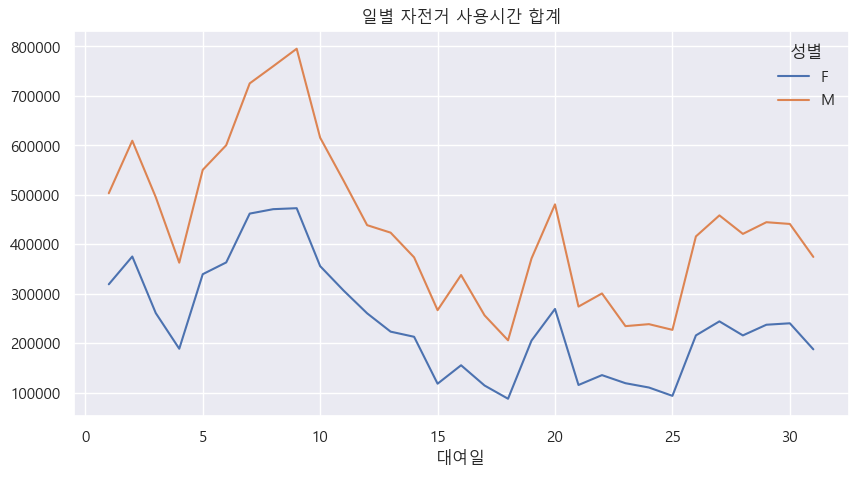

In [102]:
bike_fm.plot(title="일별 자전거 사용시간 합계")